<a href="https://colab.research.google.com/github/yeswhos/COMP5400M-Bio-inspired-Computing/blob/master/CW2/Backpropagation%20on%20the%20Iris%20data%20set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">COMP5400 - Tensorflow Demo</span> by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Marc de Kamps, University of Leeds</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

This notebook demonstrates the use of keras. We will first use it to create a multi-layer perceptron that can classify the iris data set.

In [0]:
# first check if all the prerequisites are there.
import tensorflow as tf
from tensorflow.keras import layers


If the previous cells came through, then all the important stuff has been installed on your machine. Now let's process the iris data set and create a 1-of-3 coding.

Load data file from google drive

In [77]:
from google.colab import drive
drive.mount('/content/drive')
filepath = "drive/My Drive/Bio/iris.data"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
inputs  = []
outputs = []

d = {}
d['Iris-setosa\n']     = [1., 0., 0.]
d['Iris-versicolor\n'] = [0., 1., 0.]
d['Iris-virginica\n']  = [0., 0., 1.]

# with open('iris.data') as f:
with open(filepath) as f:
    lines=f.readlines()
    for line in lines:
        items=line.split(',')
        if len(items) == 5:
            inp =  [float(x) for x in items[0:4] ]
            inputs.append(inp)
            out = d[items[4]]
            outputs.append(out)
            
print( len(inputs), 'input patterns', len(outputs), 'output patterns')

150 input patterns 150 output patterns


In [79]:
inputs  = []
outputs = []

d = {}
d['Iris-setosa\n']  = [1., 0., 0.]
d['Iris-versicolor\n'] = [0., 0., 1.]
d['Iris-virginica\n']  = [0., 0., 1.]

# with open('iris.data') as f:
with open(filepath) as f:
    lines=f.readlines()
    for line in lines:
        items=line.split(',')
        if len(items) == 5:
            inp =  [float(x) for x in items[0:4] ]
            inputs.append(inp)
            out = d[items[4]]
            outputs.append(out)
            
print( len(inputs), 'input patterns', len(outputs), 'output patterns')

150 input patterns 150 output patterns


In [0]:
import numpy as np
total = np.array(inputs)
# print(total)
set_sepal_len = total[:50:,0]
set_sepal_wid = total[:50:,1]
set_petal_len = total[:50:,2]
set_petal_wid = total[:50:,3]

versi_sepal_len = total[50:100:,0]
versi_sepal_wid = total[50:100:,1]
versi_petal_len = total[50:100:,2]
versi_petal_wid = total[50:100:,3]

virgin_sepal_len = total[100:150:,0]
virgin_sepal_wid = total[100:150:,1]
virgin_petal_len = total[100:150:,2]
virgin_petal_wid = total[100:150:,3]



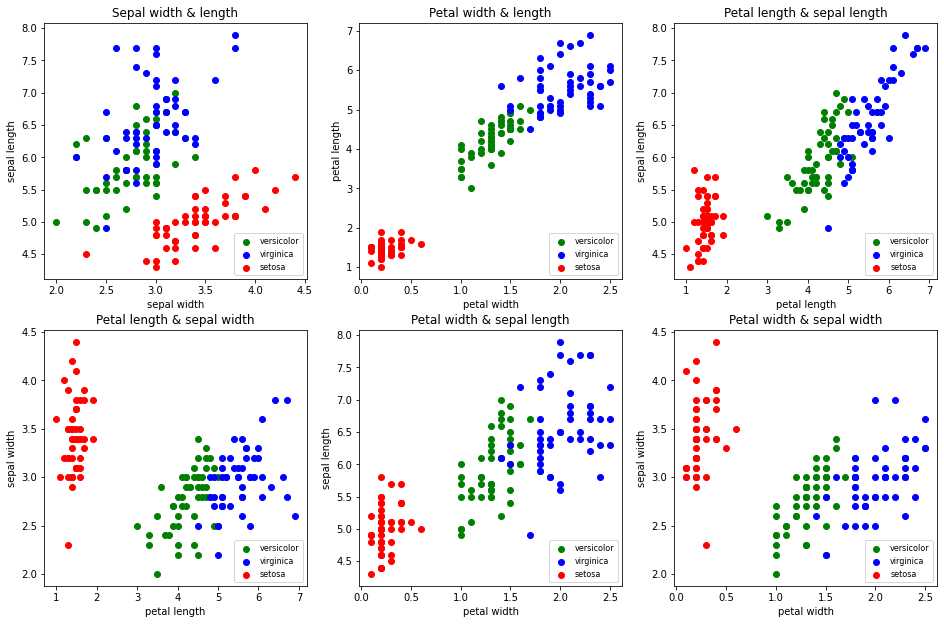

In [81]:
from pylab import *
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))
plt.subplot(3, 3, 1)
plt.title("Sepal width & length")
plt.xlabel("sepal width")
plt.ylabel("sepal length")
p1 = plt.scatter(versi_sepal_wid, versi_sepal_len, c = 'g', marker = "o")
p2 = plt.scatter(virgin_sepal_wid, virgin_sepal_len, c = 'b', marker = "o")
p3 = plt.scatter(set_sepal_wid, set_sepal_len, c = 'r', marker = "o")
plt.tick_params(axis='both', which = 'major', labelsize=10)
plt.legend([p1, p2, p3], ['versicolor', 'virginica', 'setosa'], loc = 'lower right', prop = {'size':8})

plt.subplot(3, 3, 2)
plt.title("Petal width & length")
plt.xlabel("petal width")
plt.ylabel("petal length")
p4 = plt.scatter(versi_petal_wid, versi_petal_len, c = 'g', marker = "o")
p5 = plt.scatter(virgin_petal_wid, virgin_petal_len, c = 'b', marker = "o")
p6 = plt.scatter(set_petal_wid, set_petal_len, c = 'r', marker = "o")
plt.tick_params(axis='both', which = 'major', labelsize=10)
plt.legend([p1, p2, p3], ['versicolor', 'virginica', 'setosa'], loc = 'lower right', prop = {'size':8})
#plt.legend([p4, p5, p6], ['versicolor', 'virginica', 'setosa'], loc = 'lower right')

plt.subplot(3, 3, 3)
plt.title("Petal length & sepal length")
plt.xlabel("petal length")
plt.ylabel("sepal length")
p7 = plt.scatter(versi_petal_len, versi_sepal_len, c = 'g', marker = "o")
p8 = plt.scatter(virgin_petal_len, virgin_sepal_len, c = 'b', marker = "o")
p9 = plt.scatter(set_petal_len, set_sepal_len, c = 'r', marker = "o")
plt.tick_params(axis='both', which = 'major', labelsize=10)
plt.legend([p1, p2, p3], ['versicolor', 'virginica', 'setosa'], loc = 'lower right', prop = {'size':8})

plt.subplot(3, 3, 4)
plt.title("Petal length & sepal width")
plt.xlabel("petal length")
plt.ylabel("sepal width")
p7 = plt.scatter(versi_petal_len, versi_sepal_wid, c = 'g', marker = "o")
p8 = plt.scatter(virgin_petal_len, virgin_sepal_wid, c = 'b', marker = "o")
p9 = plt.scatter(set_petal_len, set_sepal_wid, c = 'r', marker = "o")
plt.tick_params(axis='both', which = 'major', labelsize=10)
plt.legend([p1, p2, p3], ['versicolor', 'virginica', 'setosa'], loc = 'lower right', prop = {'size':8})

plt.subplot(3, 3, 5)
plt.title("Petal width & sepal length")
plt.xlabel("petal width")
plt.ylabel("sepal length")
p7 = plt.scatter(versi_petal_wid, versi_sepal_len, c = 'g', marker = "o")
p8 = plt.scatter(virgin_petal_wid, virgin_sepal_len, c = 'b', marker = "o")
p9 = plt.scatter(set_petal_wid, set_sepal_len, c = 'r', marker = "o")
plt.tick_params(axis='both', which = 'major', labelsize=10)
plt.legend([p1, p2, p3], ['versicolor', 'virginica', 'setosa'], loc = 'lower right', prop = {'size':8})

plt.subplot(3, 3, 6)
plt.title("Petal width & sepal width")
plt.xlabel("petal width")
plt.ylabel("sepal width")
p7 = plt.scatter(versi_petal_wid, versi_sepal_wid, c = 'g', marker = "o")
p8 = plt.scatter(virgin_petal_wid, virgin_sepal_wid, c = 'b', marker = "o")
p9 = plt.scatter(set_petal_wid, set_sepal_wid, c = 'r', marker = "o")
plt.tick_params(axis='both', which = 'major', labelsize=10)
plt.legend([p1, p2, p3], ['versicolor', 'virginica', 'setosa'], loc = 'lower right', prop = {'size':8})
plt.show()

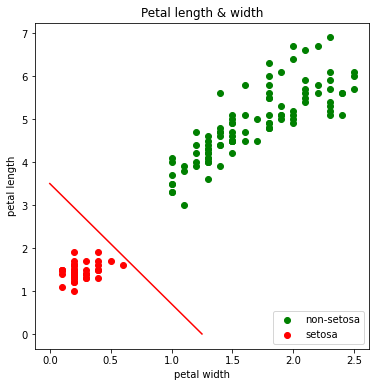

In [82]:
plt.figure(figsize=(6, 6))
plt.title("Petal length & width")
plt.xlabel("petal width")
plt.ylabel("petal length")
p1 = plt.scatter(versi_petal_wid, versi_petal_len, c = 'g', marker = "o")
p2 = plt.scatter(virgin_petal_wid, virgin_petal_len, c = 'g', marker = "o")
p3 = plt.scatter(set_petal_wid, set_petal_len, c = 'r', marker = "o")
plt.tick_params(axis='both', which = 'major', labelsize=10)
plt.legend([p2, p3], ['non-setosa', 'setosa'], loc = 'lower right')
x = [0, 3.5]
y = [1.25, 0]
plt.plot(y, x, 'r')
plt.show()

Now we build a network. A stack of layers is captured by the tf.keras.Sequential model.

In [0]:
# import numpy as np
import random
ids=random.sample(range(0,len(inputs)), 100) # generate 100 random ids
train_in = []
train_out=[]
for id in ids:
    train_in.append(inputs[id])
    train_out.append(outputs[id])
train_inputs  = np.array(train_in)
train_outputs = np.array(train_out)

val_input =[]
val_output=[]
validation_ids = list(set(range(0,len(inputs))) - set(ids))
for val_id in validation_ids:
    val_input.append(inputs[val_id])
    val_output.append(outputs[val_id])
val_inputs  = np.array(val_input)
val_outputs = np.array(val_output)


In [84]:
print(train_outputs[10:15])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
model = tf.keras.Sequential()
# an mlp with a given number of input nodes. Four input nodes, three output nodes 
nr_hidden = 5
nr_in     = 4
nr_out    = 3 
model.add(layers.Dense(nr_in,activation='relu'))
model.add(layers.Dense(nr_hidden, activation = 'sigmoid'))
model.add(layers.Dense(nr_out,activation='sigmoid'))
model.compile(optimizer=tf.train.GradientDescentOptimizer(0.09),loss='mse',metrics=['accuracy'])

Create training set and bring them into a numpy array form. Let's use a 100 patterns for training. Also, build a validation set.

Now train:

In [114]:
earlystop=tf.keras.callbacks.EarlyStopping(monitor='val_acc',min_delta=-0.01,patience=800,verbose=True,restore_best_weights=True)
callbacks=[earlystop]
history_model = model.fit(train_inputs,train_outputs,epochs=1000,batch_size=30,validation_data=(val_inputs,val_outputs),callbacks=callbacks)
#model.fit(train_inputs,train_outputs,epochs=500,batch_size=30, validation_data=(val_inputs, val_outputs))

Train on 100 samples, validate on 50 samples
Epoch 1/1000
100/100 [==============================] - 0s 1ms/sample - loss: 0.2138 - acc: 0.7200 - val_loss: 0.2517 - val_acc: 0.5600
Epoch 2/1000
100/100 [==============================] - 0s 95us/sample - loss: 0.2081 - acc: 0.7200 - val_loss: 0.2468 - val_acc: 0.5600
Epoch 3/1000
100/100 [==============================] - 0s 104us/sample - loss: 0.2027 - acc: 0.7200 - val_loss: 0.2423 - val_acc: 0.5600
Epoch 4/1000
100/100 [==============================] - 0s 86us/sample - loss: 0.1978 - acc: 0.7200 - val_loss: 0.2382 - val_acc: 0.5600
Epoch 5/1000
100/100 [==============================] - 0s 91us/sample - loss: 0.1934 - acc: 0.7200 - val_loss: 0.2342 - val_acc: 0.5600
Epoch 6/1000
100/100 [==============================] - 0s 98us/sample - loss: 0.1894 - acc: 0.7200 - val_loss: 0.2307 - val_acc: 0.5600
Epoch 7/1000
100/100 [==============================] - 0s 89us/sample - loss: 0.1857 - acc: 0.7200 - val_loss: 0.2275 - val_acc: 0.5

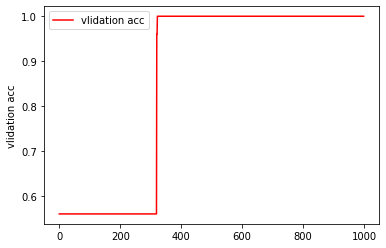

In [115]:
vla_accu=[]
vla_accu=history_model.history['val_acc']
vla_loss=[]
val_loss=history_model.history['val_loss']

Epochs=[]
i=0
for i in range(0,len(vla_accu)):
  Epochs.append(i)
  i += 1
# Sepal length with Petal length
plt.plot(Epochs,vla_accu,c='r',label="vlidation acc")
plt.ylabel('vlidation acc')
plt.legend()
plt.show()

In [30]:
history_model = model.fit(train_inputs,train_outputs,epochs=500,batch_size=30, validation_data=(val_inputs, val_outputs))
# print(history)
# keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')

Train on 100 samples, validate on 50 samples
Epoch 1/500
100/100 [==============================] - 0s 336us/sample - loss: 0.2627 - acc: 0.0000e+00 - val_loss: 0.2495 - val_acc: 0.0000e+00
Epoch 2/500
100/100 [==============================] - 0s 84us/sample - loss: 0.2412 - acc: 0.0100 - val_loss: 0.2337 - val_acc: 0.3200
Epoch 3/500
100/100 [==============================] - 0s 91us/sample - loss: 0.2206 - acc: 0.6200 - val_loss: 0.2211 - val_acc: 0.5400
Epoch 4/500
100/100 [==============================] - 0s 90us/sample - loss: 0.2042 - acc: 0.7300 - val_loss: 0.2109 - val_acc: 0.5400
Epoch 5/500
100/100 [==============================] - 0s 81us/sample - loss: 0.1900 - acc: 0.7300 - val_loss: 0.2032 - val_acc: 0.5400
Epoch 6/500
100/100 [==============================] - 0s 86us/sample - loss: 0.1794 - acc: 0.7300 - val_loss: 0.1974 - val_acc: 0.5400
Epoch 7/500
100/100 [==============================] - 0s 85us/sample - loss: 0.1710 - acc: 0.7300 - val_loss: 0.1930 - val_acc: 0

In [0]:
vla_loss = []
val_loss = history_model.history['val_loss']


In [19]:
model.predict(val_inputs[10:15])

array([[0.09187338, 0.03235349, 0.90492916],
       [0.85573435, 0.04135624, 0.1491934 ],
       [0.09159645, 0.03237534, 0.90543145],
       [0.8497749 , 0.04128527, 0.1548797 ],
       [0.85541886, 0.04134289, 0.14951499]], dtype=float32)

In [0]:
print(train_out[10:15])

[[0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [0.0, 1.0, 0.0]]


In [0]:
print(val_outputs[10:15])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
